In [1]:
from sklearn.linear_model import LogisticRegression #for logistic regression
from sklearn.pipeline import Pipeline #to assemble steps for cross validation
from sklearn.preprocessing import PolynomialFeatures #for all the polynomial features
from sklearn import svm #for Support Vector Machines
from sklearn.neighbors import NearestNeighbors #for nearest neighbor classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #for decision tree classifier
from sklearn.naive_bayes import GaussianNB  #for naive bayes classifier
from scipy import stats #for statistical info
from sklearn.model_selection import train_test_split # to split the data in train and test
from sklearn.model_selection import KFold # for cross validation
from sklearn.grid_search import GridSearchCV  # for tuning parameters
from sklearn.neighbors import KNeighborsClassifier  #for k-neighbor classifier
from sklearn import metrics  # for checking the accuracy 
from time import time

C:\Users\10170266\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\10170266\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
import nltk
import csv
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("info01.csv")

In [5]:
data.head(10)

,Birth_Year,Weight,Weight_Perception,Height,Height_Perception,Gender,School_Year,Marital_Status,Mother_Education,Mother_Profession,...,Little_Interest,Little_Energy,Feel_Failure,Life_Rewarding,Amusing,Cheerful_Effect,Healthy_Feel,Control_Life,GPA,Sleep_Hours
0,1998,160,Overweight,59,Very short,Female,Freshman,Single,College Degree,social worker,...,Several days,Several days,More than half the days,3.0,3.0,7.0,3.0,2.0,3.40,7
1,1995,160,Very fit,67,Slightly short,Male,Sophomore,In a relationship,High School Degree,Doctors Billing Assiant,...,Never,Several days,Never,9.0,9.0,8.0,9.0,8.0,3.70,8
2,1998,145,Just right,68,Tall,Female,Freshman,In a relationship,High School Degree,Police,...,Several days,More than half the days,Several days,9.0,7.0,7.0,7.0,9.0,4.00,7
3,1998,264,Overweight,60,Slightly short,Male,Freshman,In a relationship,College Degree,Child care provider,...,More than half the days,More than half the days,Nearly every day,9.0,9.0,6.0,9.0,8.0,3.40,8
4,1995,175,Slim,68,Slightly short,Male,Senior,In a relationship,High School Degree,Marketing Analyst,...,Never,Never,Never,5.0,10.0,5.0,3.0,8.0,3.00,7
5,1994,190,Slightly overweight,66,Slightly short,Male,Senior,Single,Graduate Degree,Lawyer,...,Never,Several days,More than half the days,8.0,5.0,7.0,5.0,5.0,3.40,5
6,1995,150,Slightly overweight,69,Tall,Female,Senior,Single,Graduate Degree,program director,...,Never,Several days,Never,4.0,5.0,3.0,4.0,2.0,3.70,7
7,1996,140,Slim,68,Slightly short,Male,Junior,Single,College Degree,Teacher,...,Never,Never,Never,1.0,1.0,1.0,2.0,1.0,3.00,6
8,1994,195,Very fit,76,Tall,Male,Senior,In a relationship,High School Degree,House wife,...,Never,Several days,Several days,7.0,3.0,7.0,8.0,7.0,3.87,8
9,1995,170,Slightly overweight,72,Too tall,Female,Senior,In a relationship,College Degree,Accountant,...,Never,Nearly every day,Several days,1.0,1.0,3.0,9.0,8.0,3.60,9


In [6]:
data.shape

(163, 88)

In [8]:
len(data)

163

In [10]:
data.shape[1] #finding how many variables

88

In [12]:
data.shape[0] #finding how many rows

163

In [16]:
freshman = len(data[data['School_Year']=='Freshman']) #freshman
sophomore = len(data[data['School_Year']=='Sophomore']) #sophomore
junior = len(data[data['School_Year']=='Junior']) #Junior
senior = len(data[data['School_Year']=='Senior']) #Senior

In [17]:
fresh_perc =(float(freshman)/len(data)*100) #percentage of freshman in the data
soph_perc = (float(sophomore)/len(data)*100)
jun_perc = (float(junior)/len(data)*100)
sen_perc = (float(senior)/len(data)*100)

In [42]:
#the right formatting for python 3.6
print ("percentage of freshmen is:"+"{0}".format(fresh_perc))
print ("percentage of sophomores is:"+"{:.2f}".format(soph_perc))
print ("percentage of juniors is:"+"{:.2f}".format(jun_perc))
print ("percentage of seniors is:"+"{:.4f}".format(sen_perc))

percentage of freshmen is:31.28834355828221
percentage of sophomores is:23.93
percentage of juniors is:23.31
percentage of seniors is:21.4724


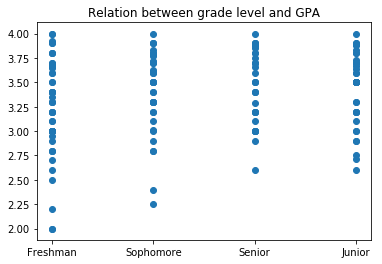

In [43]:
fig, ax=plt.subplots(1)
for i in range(1):
    x= data['School_Year']
    y=data['GPA']
    ax.scatter(x,y, label=str(i))
    ax.set_title ('Relation between grade level and GPA')
    

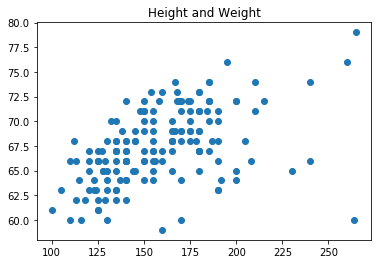

In [46]:
fig, ax=plt.subplots(1)
for i in range(1):
    x= data['Weight']
    y=data['Height']
    ax.scatter(x,y, label=str(i))
    ax.set_title ('Height and Weight')

In [49]:
import bokeh